## BindsNet Poisson Encoder

In [ ]:
%pip install bindsnet
%pip install torch

### Libraries

In [1]:
import os
import copy
import numpy as np
import torch
import pandas as pd

from matplotlib import pyplot as plt

from bindsnet.encoding import PoissonEncoder
from bindsnet.datasets import MNIST
from torchvision import transforms

plt.rcParams['figure.figsize'] = [20, 10]

### Parameters

In [2]:
time_window = 250  # time in ms
dt = 1  # interval length in ms
intensity = 128  # input layer Poisson spikes maximum firing rate, in Hz

### Load MNIST dataset

In [3]:
# Load MNIST data.
dataset = MNIST(
    image_encoder=PoissonEncoder(time=time_window, dt=dt),
    label_encoder=None,
    root=os.path.join("..", "data", "MNIST"),
    download=True,
    transform=transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x * intensity)])
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/TorchvisionDatasetWrapper/raw/train-images-idx3-ubyte.gz to ../data/MNIST/TorchvisionDatasetWrapper/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/TorchvisionDatasetWrapper/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/TorchvisionDatasetWrapper/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/TorchvisionDatasetWrapper/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/TorchvisionDatasetWrapper/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/TorchvisionDatasetWrapper/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/TorchvisionDatasetWrapper/raw



### Examples

In [4]:
print(f"This dataset is dict with the following keys: {dataset[0].keys()}")

This dataset is dict with the following keys: dict_keys(['image', 'label', 'encoded_image', 'encoded_label'])


The first element is the digit: 5


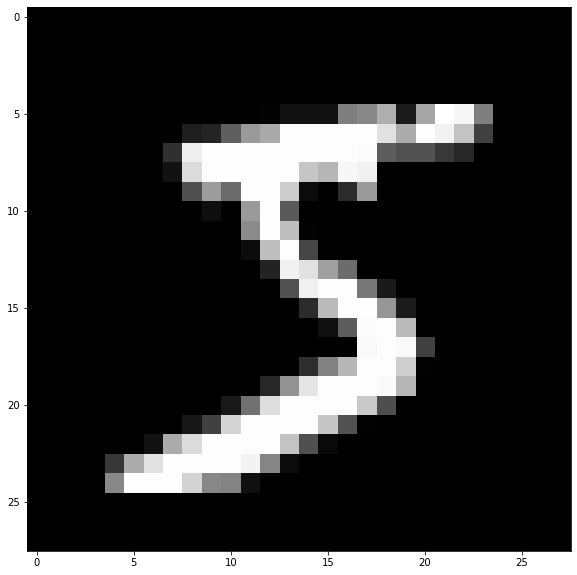

In [5]:
first_image = np.array(dataset[0]["image"], dtype='float')
print(f"The first element is the digit: {dataset[0]['label']}")
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

##### In pixel grey levels

In [6]:
dataset[0]["image"]

tensor([[[  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.000

In [7]:
dataset[0]["image"].shape

torch.Size([1, 28, 28])

In [8]:
# Check for instance the 9th row
dataset[0]["image"][0][9]

tensor([  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,  40.1569,  78.3059,  53.7098, 126.9961, 126.9961, 102.9020,
          5.5216,   0.0000,  21.5843,  77.3020,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000])

##### Encode in Spikes

In [9]:
encoded_image_1 = copy.deepcopy(dataset[0]["encoded_image"])

In [10]:
encoded_image_1.shape

torch.Size([250, 1, 28, 28])

In [18]:
# example of spike tensor in interval 2, row 9
encoded_image_1[6][0][8]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], dtype=torch.uint8)

This tensor is created via the BindsNet Poisson encoder. This encoder creates tensors with spike times during interval $\delta$ with Poisson distribution based on intensity of image pixel. In case new spikes were generated the value for this interval in the output tensor becomes 1.

In [19]:
rows = []
spikes = []
sum_row = 0
for r in range(encoded_image_1.shape[2]):
    for i in range(int(time_window / dt)):
        sum_row += torch.sum(encoded_image_1[i][0][r])
        # print(encoded_image_1[i][0][r])
    rows.append(r)
    spikes.append(int(sum_row))
    print(f"The number of spike on row {r} are: {sum_row}")
    sum_row = 0

The number of spike on row 0 are: 0
The number of spike on row 1 are: 0
The number of spike on row 2 are: 0
The number of spike on row 3 are: 0
The number of spike on row 4 are: 0
The number of spike on row 5 are: 155
The number of spike on row 6 are: 367
The number of spike on row 7 are: 353
The number of spike on row 8 are: 298
The number of spike on row 9 are: 153
The number of spike on row 10 are: 65
The number of spike on row 11 are: 74
The number of spike on row 12 are: 66
The number of spike on row 13 are: 97
The number of spike on row 14 are: 123
The number of spike on row 15 are: 114
The number of spike on row 16 are: 98
The number of spike on row 17 are: 103
The number of spike on row 18 are: 134
The number of spike on row 19 are: 203
The number of spike on row 20 are: 206
The number of spike on row 21 are: 201
The number of spike on row 22 are: 212
The number of spike on row 23 are: 226
The number of spike on row 24 are: 169
The number of spike on row 25 are: 0
The number of

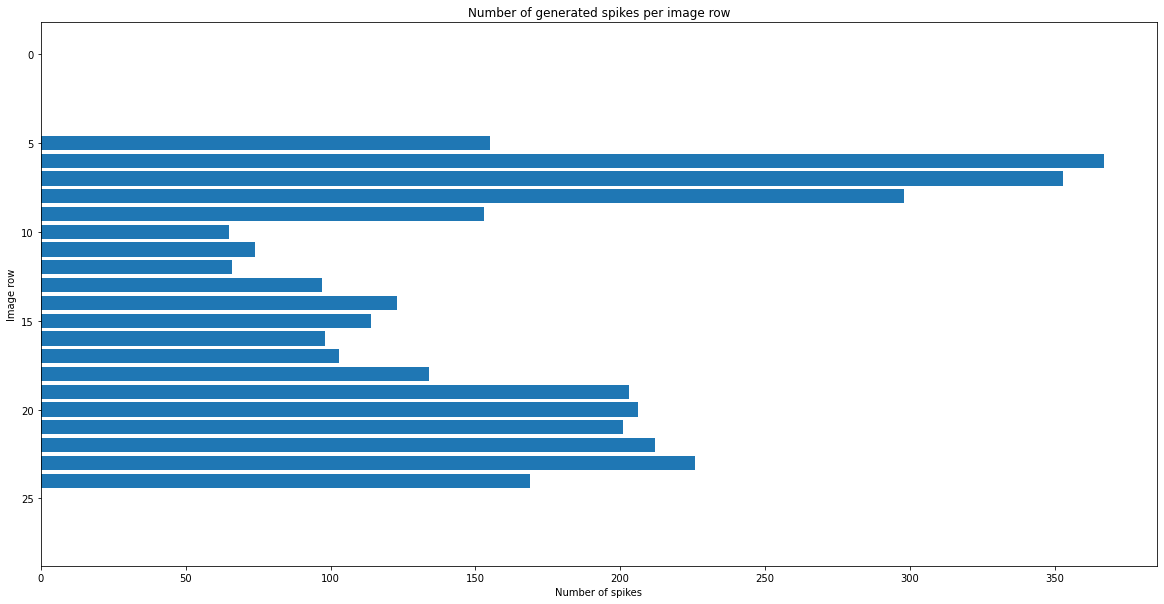

In [21]:
row_spikes = pd.DataFrame({"image_row": rows, "number_spikes": spikes})
plt.barh("image_row", "number_spikes", data=row_spikes)
plt.gca().invert_yaxis()
plt.xlabel("Number of spikes")
plt.ylabel("Image row")
plt.title("Number of generated spikes per image row")
plt.show()

##### Example 2

The second element is the digit: 0


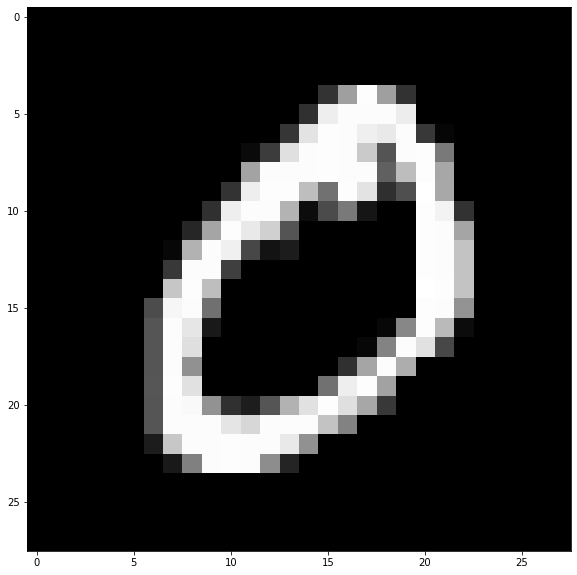

In [22]:
second_image = np.array(dataset[1]["image"], dtype='float')
print(f"The second element is the digit: {dataset[1]['label']}")
pixels = second_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [23]:
encoded_image_2 = copy.deepcopy(dataset[1]["encoded_image"])
rows = []
spikes = []
sum_row = 0
for r in range(encoded_image_2.shape[2]):
    for i in range(time_window):
        sum_row += torch.sum(encoded_image_2[i][0][r])
    rows.append(r)
    spikes.append(int(sum_row))
    print(f"The number of spike on row {r} are: {sum_row}")
    sum_row = 0

The number of spike on row 0 are: 0
The number of spike on row 1 are: 0
The number of spike on row 2 are: 0
The number of spike on row 3 are: 0
The number of spike on row 4 are: 79
The number of spike on row 5 are: 164
The number of spike on row 6 are: 199
The number of spike on row 7 are: 237
The number of spike on row 8 are: 292
The number of spike on row 9 are: 257
The number of spike on row 10 are: 214
The number of spike on row 11 are: 200
The number of spike on row 12 are: 184
The number of spike on row 13 are: 161
The number of spike on row 14 are: 168
The number of spike on row 15 are: 158
The number of spike on row 16 are: 146
The number of spike on row 17 are: 153
The number of spike on row 18 are: 136
The number of spike on row 19 are: 163
The number of spike on row 20 are: 242
The number of spike on row 21 are: 288
The number of spike on row 22 are: 230
The number of spike on row 23 are: 137
The number of spike on row 24 are: 0
The number of spike on row 25 are: 0
The numbe

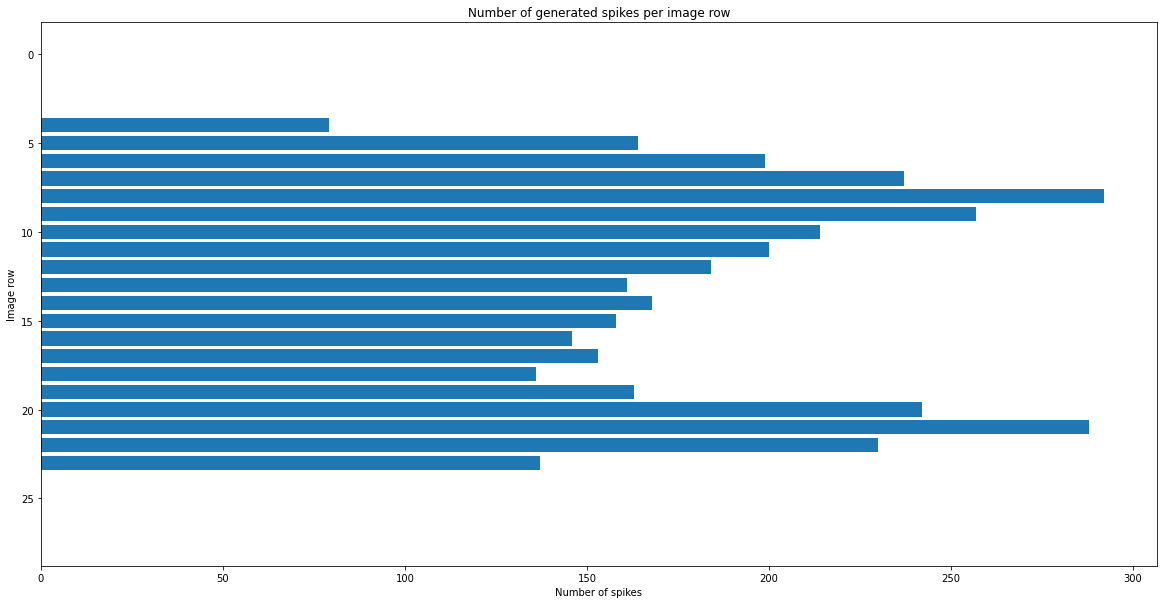

In [24]:
row_spikes = pd.DataFrame({"image_row": rows, "number_spikes": spikes})
plt.barh("image_row", "number_spikes", data=row_spikes)
plt.gca().invert_yaxis()
plt.xlabel("Number of spikes")
plt.ylabel("Image row")
plt.title("Number of generated spikes per image row")
plt.show()